# Fit Best models

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import math
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import xgboost as xgb

In [2]:
seed=42
kf=4

In [3]:
X11Y11_train=pd.read_excel('X11Y11_train.xlsx')
X11Y11_test=pd.read_excel('X11Y11_test.xlsx')

In [4]:
LassoFeatToDrop =['Student_Computer', 'Student_Internet', 'Student_ActiveWorking',
       'Student_Parish', 'Student_County', 'STD_Resp_Himself',
       'STD_Resp_LegalResp', 'FTH_Nation_EEUR', 'FTH_Nation_OTHERS',
       'FTH_Nation_RICH', 'SES_STDRESP_ProfClass_UnivI',
       'SES_STDRESP_ProfClass_UnivII',
       'SES_STDRESP_ProfClass_Unknown_NoProfession',
       'SES_FATH_ProfClass_BasicI', 'SES_FATH_ProfClass_Unknown_NoProfession',
       'SES_MOTH_ProfClass_UnivI', 'SES_MOTH_ProfClass_Unknown_NoProfession',
       'SES_STDRESP_JobSit_HomeAffairs', 'SES_STDRESP_JobSit_Other',
       'SES_STDRESP_JobSit_Retired', 'SES_STDRESP_JobSit_Student',
       'SES_STDRESP_JobSit_Unemployed', 'SES_STDRESP_JobSit_Unknown',
       'SES_FATH_JobSit_Employer', 'SES_FATH_JobSit_Other',
       'SES_FATH_JobSit_Retired', 'SES_FATH_JobSit_SelfEmployed',
       'SES_FATH_JobSit_Student', 'SES_FATH_JobSit_Unemployed',
       'SES_FATH_JobSit_Unknown', 'SES_MOTH_JobSit_Employer',
       'SES_MOTH_JobSit_HomeAffairs', 'SES_MOTH_JobSit_SelfEmployed',
       'SES_MOTH_JobSit_Student', 'SES_MOTH_JobSit_Unemployed',
       'SES_MOTH_JobSit_Unknown', 'SES_STDRESP_AcadEduc_Basic_III',
       'SES_STDRESP_AcadEduc_Master', 'SES_STDRESP_AcadEduc_Other',
       'SES_STDRESP_AcadEduc_PostGraduation', 'SES_STDRESP_AcadEduc_Unknown',
       'SES_FATH_AcadEduc_Bachelor', 'SES_FATH_AcadEduc_Basic_III',
       'SES_FATH_AcadEduc_NoFormalEducation', 'SES_FATH_AcadEduc_Other',
       'SES_FATH_AcadEduc_PostGraduation', 'SES_FATH_AcadEduc_Unknown',
       'SES_MOTH_AcadEduc_Bachelor', 'SES_MOTH_AcadEduc_Basic_II',
       'SES_MOTH_AcadEduc_NoFormalEducation', 'SES_MOTH_AcadEduc_Other',
       'SES_MOTH_AcadEduc_PostGraduation', 'SES_MOTH_AcadEduc_Unknown',
       'SES_Scholarship_Half_Support', 'SES%_Parish_CollectiveDwellings',
       'SES%_Parish_IliteracyRate', 'SES%_Parish_PostSecondarySchoolingRate',
       'SES%_Parish_PrimarySector', 'Tch_FixedTermStaff',
       'Tch_PedagogicZoneDefinitivePermanentStaff',
       'Tch_PedagogicZoneNoDefinitivePermanentStaff',
       'Tch_SchoolClusterNoDefinitivePermanentStaff',
       'Tch_SchoolNoDefinitivePermanentStaff', 'Tch_AcadEduc_Bachelor',
       'Tch_AcadEduc_Phd_Master', 'Tch_Step_8910', 'Tch_Gender_F',
       'Teacher_EducationSupport', 'Teacher_Age',
       'Teacher_TeachingDedicatedTime', 'Teacher_NoTeachingDedicatedTime']

In [5]:
XY_train=X11Y11_train.drop(LassoFeatToDrop, axis=1)
XY_test=X11Y11_test.drop(LassoFeatToDrop, axis=1)

In [6]:
XY_train=XY_train.drop(['Unnamed: 0', 'AcYear_11', 'AcYear_12'], axis=1)
XY_test=XY_test.drop(['Unnamed: 0', 'AcYear_11', 'AcYear_12'], axis=1)

In [7]:
XY_test.shape

(9488, 50)

In [8]:
X_train=XY_train.iloc[:,:49]
Y_train=XY_train.iloc[:,-1]

X_test=XY_test.iloc[:,:49]
Y_test=XY_test.iloc[:,-1]

In [9]:
Y_train=Y_train.to_numpy()
Y_test=Y_test.to_numpy()

In [10]:
X_train.columns

Index(['Std_Gender_F', 'N_Retentions', 'School_Size', 'Class_Size',
       'Student_NumberEnrolments', 'STD_Resp_CloseRelative', 'STD_Resp_Father',
       'FTH_Nation_AFR', 'FTH_Nation_BR', 'FTH_Nation_CHN',
       'SES_STDRESP_ProfClass_BasicI', 'SES_FATH_ProfClass_UnivI',
       'SES_FATH_ProfClass_UnivII', 'SES_MOTH_ProfClass_BasicI',
       'SES_MOTH_ProfClass_UnivII', 'SES_STDRESP_JobSit_Employer',
       'SES_STDRESP_JobSit_SelfEmployed', 'SES_FATH_JobSit_HomeAffairs',
       'SES_MOTH_JobSit_Other', 'SES_MOTH_JobSit_Retired',
       'SES_STDRESP_AcadEduc_Bachelor', 'SES_STDRESP_AcadEduc_Basic_I',
       'SES_STDRESP_AcadEduc_Basic_II', 'SES_STDRESP_AcadEduc_Degree',
       'SES_STDRESP_AcadEduc_NoFormalEducation', 'SES_STDRESP_AcadEduc_Phd',
       'SES_FATH_AcadEduc_Basic_I', 'SES_FATH_AcadEduc_Basic_II',
       'SES_FATH_AcadEduc_Degree', 'SES_FATH_AcadEduc_Master',
       'SES_FATH_AcadEduc_Phd', 'SES_MOTH_AcadEduc_Basic_I',
       'SES_MOTH_AcadEduc_Basic_III', 'SES_MOTH_Aca

In [11]:
# standardization
scaler=StandardScaler()

In [12]:
tscale=scaler.fit(X_train)
X_train_std=tscale.transform(X_train)
X_test_std=tscale.transform(X_test)

## Fit best models

### OLS - Multiple Linear Regression

In [13]:
OLS_rgr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [14]:
# Define sklearn pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('OLS', OLS_rgr))
pipeline = Pipeline(estimators)

In [15]:
OLS_rgr.fit(X_train_std, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
OLS_rgr.score(X_train_std, Y_train)

0.16444939041191475

In [17]:
OLS_rgr.coef_

array([ 0.41799674, -0.37950065,  0.07451031,  0.02911293, -0.03333604,
       -0.02945469,  0.04878682, -0.03454578,  0.03821111,  0.03821893,
       -0.02464988,  0.0383807 ,  0.11266056, -0.01754365,  0.13772113,
       -0.03841477, -0.03923797, -0.04175595, -0.0606585 , -0.02904791,
        0.06907931, -0.05228655, -0.04049974,  0.05338095, -0.0321535 ,
        0.01729078, -0.03604605, -0.02999972,  0.13346991,  0.07243475,
        0.11064359, -0.01965616, -0.10668811,  0.18032213,  0.07023392,
        0.03889999, -0.04296694, -0.04428037,  0.19952279,  0.05491631,
        0.0666894 ,  0.0355975 ,  0.03528861, -0.03197627, -0.03874448,
       -0.06215058,  0.71353286, -0.02199991,  0.21677998])

In [18]:
OLS_rgr.intercept_

13.755129023433938

In [19]:
scores_MSE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_squared_error')
scores_MAE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_absolute_error')
scores_R2 = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='r2')

In [20]:
print("MSE: %0.2f (+/- %0.2f)" % (-scores_MSE.mean(), scores_MSE.std() * 2))
print("MAE: %0.2f (+/- %0.2f)" % (-scores_MAE.mean(), scores_MAE.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (-scores_R2.mean(), scores_R2.std() * 2))

MSE: 6.58 (+/- 0.14)
MAE: 2.09 (+/- 0.02)
R2: -0.16 (+/- 0.02)


In [21]:
df_scorescv_ols_MSE=pd.DataFrame(scores_MSE)
df_scorescv_ols_MAE=pd.DataFrame(scores_MAE)
df_scorescv_ols_R2=pd.DataFrame(scores_R2)

In [22]:
df_scorescv_ols_MSE.to_excel('FINALRESULTS_CV_11.xlsx', sheet_name='OLS_MSE')

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_ols_MAE.to_excel(writer, sheet_name='OLS_MAE')

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_ols_R2.to_excel(writer, sheet_name='OLS_R2')

In [23]:
mse_OLS_rgr_cv = -scores_MSE.mean()
mse_std_OLS_rgr_cv = -scores_MSE.std()
mae_OLS_rgr_cv = -scores_MAE.mean()
mae_std_OLS_rgr_cv = -scores_MAE.std()
r2_OLS_rgr_cv = -scores_R2.mean()
r2_std_OLS_rgr_cv = -scores_R2.std()

In [24]:
Y_train_pred=OLS_rgr.predict(X_train_std)
Y_test_pred=OLS_rgr.predict(X_test_std)

In [25]:
mse_OLS_rgr_train = metrics.mean_squared_error(Y_train, Y_train_pred) 
mse_OLS_rgr_test = metrics.mean_squared_error(Y_test, Y_test_pred)

mae_OLS_rgr_train = metrics.mean_absolute_error(Y_train, Y_train_pred) 
mae_OLS_rgr_test = metrics.mean_absolute_error(Y_test, Y_test_pred)

r2_OLS_rgr_train = metrics.r2_score(Y_train, Y_train_pred)
r2_OLS_rgr_test = metrics.r2_score(Y_test, Y_test_pred)

In [26]:
columns = ['MSE_train','MAE_train','R2_train',
           'MSE_cv','MSE_std_cv','MAE_cv','MAE_std_cv','R2_cv','R2_std_cv',
           'MSE_test','MAE_test', 'R2_test']

In [27]:
df_results= pd.DataFrame(columns=columns)

In [28]:
new_results_dic = {'MSE_train': mse_OLS_rgr_train, 'MAE_train': mae_OLS_rgr_train,'R2_train': r2_OLS_rgr_train,
                   'MSE_cv': mse_OLS_rgr_cv, 'MSE_std_cv': mse_std_OLS_rgr_cv, 'MAE_cv': mae_OLS_rgr_cv,
                   'MAE_std_cv': mae_std_OLS_rgr_cv, 'R2_cv': r2_OLS_rgr_cv, 'R2_std_cv': r2_std_OLS_rgr_cv,
                   'MSE_test': mse_OLS_rgr_test, 'MAE_test': mae_OLS_rgr_test, 'R2_test': r2_OLS_rgr_test}
df_results.loc[len(df_results)] = new_results_dic


In [29]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'OLS'}, inplace=True)
df_results.head()

,MSE_train,MAE_train,R2_train,MSE_cv,MSE_std_cv,MAE_cv,MAE_std_cv,R2_cv,R2_std_cv,MSE_test,MAE_test,R2_test
OLS,6.539793,2.083443,0.164449,6.580865,-0.069856,2.090003,-0.011773,-0.159108,-0.007535,6.559855,2.088153,0.15609


In [30]:
X_train_constant = sm.add_constant(X_train)
X_test_constant = sm.add_constant(X_test)
X_train_std_constant=sm.add_constant(X_train_std)

In [31]:
OLS_model = sm.OLS(Y_train, X_train_std_constant)
lr = OLS_model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     87.90
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:51:09   Log-Likelihood:                -51718.
No. Observations:               21934   AIC:                         1.035e+05
Df Residuals:                   21884   BIC:                         1.039e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7551      0.017    795.694      0.000      13.721      13.789
x1             0.4180      0.017     23.961      0.000       0.384       0.452
x2            -0.3795      0.018    -20.922      0.000      -0.415      -0.344
x3             0.0745      0.018      4.147      0.000       0.039       0.110
x4             0.0291      0.018      1.640      0.101      -0.006       0.064
x5            -0.0333      0.017     -1.912      0.056      -0.068       0.001
x6            -0.0295      0.018     -1.658      0.097      -0.064       0.005
x7             0.0488      0.018      2.770      0.006       0.014       0.083
x8            -0.0345      0.017     -1.977      0.048      -0.069      -0.000
x9             0.0382      0.017      2.198      0.028       0.004       0.072
x10            0.0382      0.017      2.199      0.028       0.004       0.072
x11           -0.0246      0.036     -0.688      0.492      -0.095       0.046
x12            0.0384      0.018      2.150      0.032       0.003       0.073
x13            0.1127      0.023      4.995      0.000       0.068       0.157
x14           -0.0175      0.036     -0.490      0.624      -0.088       0.053
x15            0.1377      0.024      5.699      0.000       0.090       0.185
x16           -0.0384      0.018     -2.195      0.028      -0.073      -0.004
x17           -0.0392      0.018     -2.239      0.025      -0.074      -0.005
x18           -0.0418      0.017     -2.404      0.016      -0.076      -0.008
x19           -0.0607      0.017     -3.501      0.000      -0.095      -0.027
x20           -0.0290      0.017     -1.677      0.094      -0.063       0.005
x21            0.0691      0.018      3.891      0.000       0.034       0.104
x22           -0.0523      0.035     -1.509      0.131      -0.120       0.016
x23           -0.0405      0.022     -1.861      0.063      -0.083       0.002
x24            0.0534      0.045      1.194      0.232      -0.034       0.141
x25           -0.0322      0.018     -1.818      0.069      -0.067       0.003
x26            0.0173      0.029      0.605      0.545      -0.039       0.073
x27           -0.0360      0.021     -1.744      0.081      -0.077       0.004
x28           -0.0300      0.021     -1.417      0.156      -0.071       0.011
x29            0.1335      0.023      5.704      0.000       0.088       0.179
x30            0.0724      0.018      3.932      0.000       0.036       0.109
x31            0.1106      0.022      5.110      0.000       0.068       0.153
x32           -0.0197      0.033     -0.589      0.556      -0.085       0.046
x33           -0.1067      0.019     -5.599      0.000      -0.144      -0.069
x34            0.1803      0.044      4.093      0.000       0.094       0.267
x35            0.0702      0.019      3.719      0.000       0.033       0.107
x3

### RF - Random Forest

In [32]:
rf_rgr = RandomForestRegressor(n_estimators = 420, criterion="mse", min_samples_leaf=0.001,
                               min_samples_split=0.009 , bootstrap=True, random_state=seed)

In [33]:
# Define sklearn pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('RF', rf_rgr))
pipeline = Pipeline(estimators)

In [34]:
scores_MSE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_squared_error')
scores_MAE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_absolute_error')
scores_R2 = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='r2')

In [35]:
print("MSE: %0.2f (+/- %0.2f)" % (-scores_MSE.mean(), scores_MSE.std() * 2))
print("MAE: %0.2f (+/- %0.2f)" % (-scores_MAE.mean(), scores_MAE.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (-scores_R2.mean(), scores_R2.std() * 2))

MSE: 6.49 (+/- 0.15)
MAE: 2.07 (+/- 0.02)
R2: -0.17 (+/- 0.02)


In [36]:
df_scorescv_rf_MSE=pd.DataFrame(scores_MSE)
df_scorescv_rf_MAE=pd.DataFrame(scores_MAE)
df_scorescv_rf_R2=pd.DataFrame(scores_R2)

In [37]:
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_rf_MSE.to_excel(writer, sheet_name='RF_MSE')

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_rf_MAE.to_excel(writer, sheet_name='RF_MAE')
    

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_rf_R2.to_excel(writer, sheet_name='RF_R2')

In [38]:
mse_rf_rgr_cv = -scores_MSE.mean()
mse_std_rf_rgr_cv = -scores_MSE.std()
mae_rf_rgr_cv = -scores_MAE.mean()
mae_std_rf_rgr_cv = -scores_MAE.std()
r2_rf_rgr_cv = -scores_R2.mean()
r2_std_rf_rgr_cv = -scores_R2.std()

In [39]:
rf_rgr.fit(X_train_std, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.001,
                      min_samples_split=0.009, min_weight_fraction_leaf=0.0,
                      n_estimators=420, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [40]:
df_Feat_import = pd.DataFrame(rf_rgr.feature_importances_)

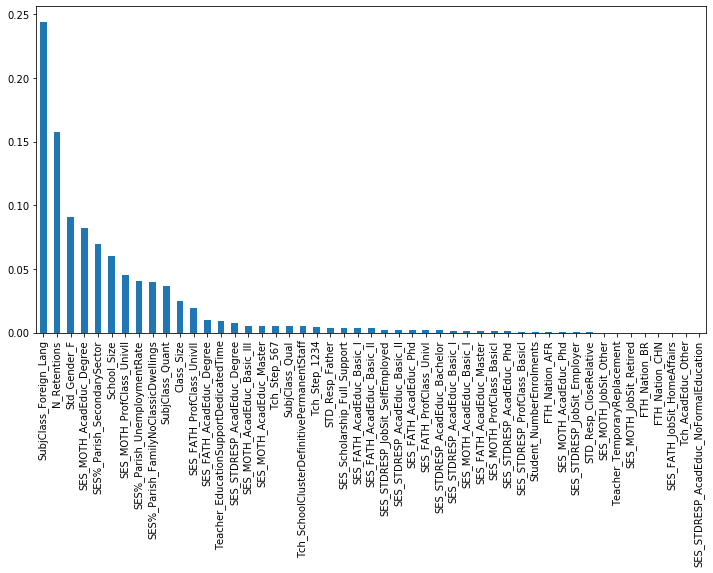

In [41]:
pd.Series(rf_rgr.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

In [42]:
df_Feat_import.to_excel('FEATURES_RF_11.xlsx', sheet_name='FEAT_IMP')

In [43]:
Y_train_pred=rf_rgr.predict(X_train_std)
Y_test_pred=rf_rgr.predict(X_test_std)

In [44]:
mse_rf_rgr_train = metrics.mean_squared_error(Y_train, Y_train_pred) 
mse_rf_rgr_test = metrics.mean_squared_error(Y_test, Y_test_pred)

mae_rf_rgr_train = metrics.mean_absolute_error(Y_train, Y_train_pred) 
mae_rf_rgr_test = metrics.mean_absolute_error(Y_test, Y_test_pred)

r2_rf_rgr_train = metrics.r2_score(Y_train, Y_train_pred)
r2_rf_rgr_test = metrics.r2_score(Y_test, Y_test_pred)

In [45]:
new_results_dic = {'MSE_train': mse_rf_rgr_train, 'MAE_train': mae_rf_rgr_train,'R2_train': r2_rf_rgr_train,
                   'MSE_cv': mse_rf_rgr_cv, 'MSE_std_cv': mse_std_rf_rgr_cv, 'MAE_cv': mae_rf_rgr_cv,
                   'MAE_std_cv': mae_std_rf_rgr_cv, 'R2_cv': r2_rf_rgr_cv, 'R2_std_cv': r2_std_rf_rgr_cv,
                   'MSE_test': mse_rf_rgr_test,
                   'MAE_test': mae_rf_rgr_test,
                   'R2_test': r2_rf_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [46]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'RF'}, inplace=True)
df_results.head()

,MSE_train,MAE_train,R2_train,MSE_cv,MSE_std_cv,MAE_cv,MAE_std_cv,R2_cv,R2_std_cv,MSE_test,MAE_test,R2_test
OLS,6.539793,2.083443,0.164449,6.580865,-0.069856,2.090003,-0.011773,-0.159108,-0.007535,6.559855,2.088153,0.156090
RF,6.050672,2.001662,0.226941,6.489073,-0.075561,2.072774,-0.011955,-0.170838,-0.008319,6.440311,2.068125,0.171469


### SVR - Support Vector Regression

In [47]:
svm_rgr= SVR(C=9.541, cache_size=1000, coef0=0.0, degree=3, epsilon=0.2, gamma=0.004,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [48]:
# Define sklearn pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('SVR', svm_rgr))
pipeline = Pipeline(estimators)

In [49]:
scores_MSE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_squared_error')
scores_MAE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_absolute_error')
scores_R2 = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='r2')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [50]:
print("MSE: %0.2f (+/- %0.2f)" % (-scores_MSE.mean(), scores_MSE.std() * 2))
print("MAE: %0.2f (+/- %0.2f)" % (-scores_MAE.mean(), scores_MAE.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (-scores_R2.mean(), scores_R2.std() * 2))

MSE: 6.62 (+/- 0.18)
MAE: 2.07 (+/- 0.03)
R2: -0.15 (+/- 0.02)


In [51]:
df_scorescv_svr_MSE=pd.DataFrame(scores_MSE)
df_scorescv_svr_MAE=pd.DataFrame(scores_MAE)
df_scorescv_svr_R2=pd.DataFrame(scores_R2)

In [52]:
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_svr_MSE.to_excel(writer, sheet_name='SVR_MSE')

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_svr_MAE.to_excel(writer, sheet_name='SVR_MAE')
    
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_svr_R2.to_excel(writer, sheet_name='SVR_R2')

In [53]:
mse_svr_rgr_cv = -scores_MSE.mean()
mse_std_svr_rgr_cv = -scores_MSE.std()
mae_svr_rgr_cv = -scores_MAE.mean()
mae_std_svr_rgr_cv = -scores_MAE.std()
r2_svr_rgr_cv = -scores_R2.mean()
r2_std_svr_rgr_cv = -scores_R2.std()

In [54]:
svm_rgr.fit(X_train_std, Y_train)

[LibSVM]

SVR(C=9.541, cache_size=1000, coef0=0.0, degree=3, epsilon=0.2, gamma=0.004,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [55]:
Y_train_pred=svm_rgr.predict(X_train_std)
Y_test_pred=svm_rgr.predict(X_test_std)

In [56]:
mse_svr_rgr_train = metrics.mean_squared_error(Y_train, Y_train_pred) 
mse_svr_rgr_test = metrics.mean_squared_error(Y_test, Y_test_pred)

mae_svr_rgr_train = metrics.mean_absolute_error(Y_train, Y_train_pred) 
mae_svr_rgr_test = metrics.mean_absolute_error(Y_test, Y_test_pred)

r2_svr_rgr_train = metrics.r2_score(Y_train, Y_train_pred)
r2_svr_rgr_test = metrics.r2_score(Y_test, Y_test_pred)

In [57]:
new_results_dic = {'MSE_train': mse_svr_rgr_train, 'MAE_train': mae_svr_rgr_train,'R2_train': r2_svr_rgr_train,
                   'MSE_cv': mse_svr_rgr_cv, 'MSE_std_cv': mse_std_svr_rgr_cv, 'MAE_cv': mae_svr_rgr_cv,
                   'MAE_std_cv': mae_std_svr_rgr_cv, 'R2_cv': r2_svr_rgr_cv, 'R2_std_cv': r2_std_svr_rgr_cv,
                   'MSE_test': mse_svr_rgr_test,
                   'MAE_test': mae_svr_rgr_test,
                   'R2_test': r2_svr_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [58]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'SVR'}, inplace=True)
df_results.head()

,MSE_train,MAE_train,R2_train,MSE_cv,MSE_std_cv,MAE_cv,MAE_std_cv,R2_cv,R2_std_cv,MSE_test,MAE_test,R2_test
OLS,6.539793,2.083443,0.164449,6.580865,-0.069856,2.090003,-0.011773,-0.159108,-0.007535,6.559855,2.088153,0.156090
RF,6.050672,2.001662,0.226941,6.489073,-0.075561,2.072774,-0.011955,-0.170838,-0.008319,6.440311,2.068125,0.171469
SVR,6.124274,1.964271,0.217538,6.616647,-0.090232,2.074351,-0.016249,-0.154522,-0.011576,6.576036,2.074015,0.154008


### K-nearest Neighbours Regression 

In [59]:
knn_rgr = KNeighborsRegressor(n_neighbors=18, weights='distance', algorithm='auto', leaf_size=30,
                              p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [60]:
# Define sklearn pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('KNN', knn_rgr))
pipeline = Pipeline(estimators)

In [61]:
scores_MSE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_squared_error')
scores_MAE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_absolute_error')
scores_R2 = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='r2')

In [62]:
print("MSE: %0.2f (+/- %0.2f)" % (-scores_MSE.mean(), scores_MSE.std() * 2))
print("MAE: %0.2f (+/- %0.2f)" % (-scores_MAE.mean(), scores_MAE.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (-scores_R2.mean(), scores_R2.std() * 2))

MSE: 6.98 (+/- 0.22)
MAE: 2.14 (+/- 0.04)
R2: -0.11 (+/- 0.02)


In [63]:
df_scorescv_knn_MSE=pd.DataFrame(scores_MSE)
df_scorescv_knn_MAE=pd.DataFrame(scores_MAE)
df_scorescv_knn_R2=pd.DataFrame(scores_R2)

In [64]:
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_knn_MSE.to_excel(writer, sheet_name='KNN_MSE')

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_knn_MAE.to_excel(writer, sheet_name='KNN_MAE')
    
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_knn_R2.to_excel(writer, sheet_name='KNN_R2')

In [65]:
mse_knn_rgr_cv = -scores_MSE.mean()
mse_std_knn_rgr_cv = -scores_MSE.std()
mae_knn_rgr_cv = -scores_MAE.mean()
mae_std_knn_rgr_cv = -scores_MAE.std()
r2_knn_rgr_cv = -scores_R2.mean()
r2_std_knn_rgr_cv = -scores_R2.std()

In [66]:
knn_rgr.fit(X_train_std, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='distance')

In [67]:
Y_train_pred=knn_rgr.predict(X_train_std)
Y_test_pred=knn_rgr.predict(X_test_std)

In [68]:
mse_knn_rgr_train = metrics.mean_squared_error(Y_train, Y_train_pred) 
mse_knn_rgr_test = metrics.mean_squared_error(Y_test, Y_test_pred)

mae_knn_rgr_train = metrics.mean_absolute_error(Y_train, Y_train_pred) 
mae_knn_rgr_test = metrics.mean_absolute_error(Y_test, Y_test_pred)

r2_knn_rgr_train = metrics.r2_score(Y_train, Y_train_pred)
r2_knn_rgr_test = metrics.r2_score(Y_test, Y_test_pred)

In [69]:
new_results_dic = {'MSE_train': mse_knn_rgr_train, 'MAE_train': mae_knn_rgr_train,'R2_train': r2_knn_rgr_train,
                   'MSE_cv': mse_knn_rgr_cv, 'MSE_std_cv': mse_std_knn_rgr_cv, 'MAE_cv': mae_knn_rgr_cv,
                   'MAE_std_cv': mae_std_knn_rgr_cv, 'R2_cv': r2_knn_rgr_cv, 'R2_std_cv': r2_std_knn_rgr_cv,
                   'MSE_test': mse_knn_rgr_test,
                   'MAE_test': mae_knn_rgr_test,
                   'R2_test': r2_knn_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [70]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'KNN'}, inplace=True)
df_results.head()

,MSE_train,MAE_train,R2_train,MSE_cv,MSE_std_cv,MAE_cv,MAE_std_cv,R2_cv,R2_std_cv,MSE_test,MAE_test,R2_test
OLS,6.539793,2.083443,0.164449,6.580865,-0.069856,2.090003,-0.011773,-0.159108,-0.007535,6.559855,2.088153,0.156090
RF,6.050672,2.001662,0.226941,6.489073,-0.075561,2.072774,-0.011955,-0.170838,-0.008319,6.440311,2.068125,0.171469
SVR,6.124274,1.964271,0.217538,6.616647,-0.090232,2.074351,-0.016249,-0.154522,-0.011576,6.576036,2.074015,0.154008
KNN,0.259901,0.117710,0.966794,6.978661,-0.107720,2.139279,-0.020941,-0.108300,-0.011206,6.964761,2.137488,0.104000


### XG BOOST Machine

In [71]:
xgb_rgr = xgb.XGBRegressor(max_depth=20, learning_rate=0.42, n_estimators=156,
                           verbosity=1, objective='reg:squarederror',
                           booster='gbtree', n_jobs=-1, gamma=0,
                           min_child_weight=131.0, max_delta_step=0, subsample=1.0,
                           colsample_bytree=0.7, colsample_bylevel=1, colsample_bynode=1,
                           reg_alpha=0, reg_lambda=0.4, scale_pos_weight=1, base_score=0.5,
                           random_state=seed, seed=None, missing=None, importance_type='gain')


In [72]:
# Define sklearn pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('XGB', xgb_rgr))
pipeline = Pipeline(estimators)

In [73]:
scores_MSE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_squared_error')
scores_MAE = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='neg_mean_absolute_error')
scores_R2 = cross_val_score(pipeline, X_train, Y_train, cv=kf,
                         scoring='r2')

In [74]:
print("MSE: %0.2f (+/- %0.2f)" % (-scores_MSE.mean(), scores_MSE.std() * 2))
print("MAE: %0.2f (+/- %0.2f)" % (-scores_MAE.mean(), scores_MAE.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (-scores_R2.mean(), scores_R2.std() * 2))

MSE: 6.36 (+/- 0.14)
MAE: 2.02 (+/- 0.04)
R2: -0.19 (+/- 0.01)


In [75]:
df_scorescv_xgb_MSE=pd.DataFrame(scores_MSE)
df_scorescv_xgb_MAE=pd.DataFrame(scores_MAE)
df_scorescv_xgb_R2=pd.DataFrame(scores_R2)

In [76]:
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_xgb_MSE.to_excel(writer, sheet_name='XGB_MSE')

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_xgb_MAE.to_excel(writer, sheet_name='XGB_MAE')
    
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_xgb_R2.to_excel(writer, sheet_name='XGB_R2')

In [77]:
mse_xgb_rgr_cv = -scores_MSE.mean()
mse_std_xgb_rgr_cv = -scores_MSE.std()
mae_xgb_rgr_cv = -scores_MAE.mean()
mae_std_xgb_rgr_cv = -scores_MAE.std()
r2_xgb_rgr_cv = -scores_R2.mean()
r2_std_xgb_rgr_cv = -scores_R2.std()

In [78]:
xgb_rgr.fit(X_train_std, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.42, max_delta_step=0,
             max_depth=20, min_child_weight=131.0, missing=None,
             n_estimators=156, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0.4, scale_pos_weight=1, seed=None, silent=None,
             subsample=1.0, verbosity=1)

In [79]:
Y_train_pred=xgb_rgr.predict(X_train_std)
Y_test_pred=xgb_rgr.predict(X_test_std)

In [80]:
mse_xgb_rgr_train = metrics.mean_squared_error(Y_train, Y_train_pred) 
mse_xgb_rgr_test = metrics.mean_squared_error(Y_test, Y_test_pred)

mae_xgb_rgr_train = metrics.mean_absolute_error(Y_train, Y_train_pred) 
mae_xgb_rgr_test = metrics.mean_absolute_error(Y_test, Y_test_pred)

r2_xgb_rgr_train = metrics.r2_score(Y_train, Y_train_pred)
r2_xgb_rgr_test = metrics.r2_score(Y_test, Y_test_pred)

In [81]:
new_results_dic = {'MSE_train': mse_xgb_rgr_train, 'MAE_train': mae_xgb_rgr_train,'R2_train': r2_xgb_rgr_train,
                   'MSE_cv': mse_xgb_rgr_cv, 'MSE_std_cv': mse_std_xgb_rgr_cv, 'MAE_cv': mae_xgb_rgr_cv,
                   'MAE_std_cv': mae_std_xgb_rgr_cv, 'R2_cv': r2_xgb_rgr_cv, 'R2_std_cv': r2_std_xgb_rgr_cv,
                   'MSE_test': mse_xgb_rgr_test,
                   'MAE_test': mae_xgb_rgr_test,
                   'R2_test': r2_xgb_rgr_test}

df_results.loc[len(df_results)] = new_results_dic

In [82]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'XGB'}, inplace=True)
df_results.head()

,MSE_train,MAE_train,R2_train,MSE_cv,MSE_std_cv,MAE_cv,MAE_std_cv,R2_cv,R2_std_cv,MSE_test,MAE_test,R2_test
OLS,6.539793,2.083443,0.164449,6.580865,-0.069856,2.090003,-0.011773,-0.159108,-0.007535,6.559855,2.088153,0.156090
RF,6.050672,2.001662,0.226941,6.489073,-0.075561,2.072774,-0.011955,-0.170838,-0.008319,6.440311,2.068125,0.171469
SVR,6.124274,1.964271,0.217538,6.616647,-0.090232,2.074351,-0.016249,-0.154522,-0.011576,6.576036,2.074015,0.154008
KNN,0.259901,0.117710,0.966794,6.978661,-0.107720,2.139279,-0.020941,-0.108300,-0.011206,6.964761,2.137488,0.104000
XGB,2.609244,1.278893,0.666632,6.359796,-0.071910,2.016598,-0.020304,-0.187375,-0.005720,6.069271,1.970897,0.219203


### Neural Network

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
from keras import backend as k
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [155]:
def r2(y_true,y_pred):
    SS_res=k.sum(k.square(y_true-y_pred))
    SS_tot=k.sum(k.square(y_true-k.mean(y_true)))
    return (1-SS_res/(SS_tot))

# define base model
def baseline_model(input_dim=49,output_dim=1, init='glorot_uniform', layers=[10, 10, 10, 10, 10, 10, 10, 10],
                   activ_function='relu',
                   optim='adam' , loss_function='mse'):
    # ,Adam_lr=0.001, Adam_beta1=0.9, Adam_beta2=0.999, Adam_epsilon=1e-07
    # create model
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(units=nodes, input_dim=input_dim, kernel_initializer=init, activation=activ_function))
        else:
            model.add(Dense(units=nodes, kernel_initializer=init, activation=activ_function))
    model.add(Dense(units=output_dim, kernel_initializer=init,))
    # Compile model
    # optim_m=Adam(learning_rate=Adam_lr, beta_1=Adam_beta1, beta_2=Adam_beta2, epsilon= Adam_epsilon)
    model.compile(optimizer=optim, loss=loss_function, metrics=['mae','mse',r2])
    return model

In [156]:
#Model check point
checkpoint_filepath= 'weights11.hdf5'
checkpoint=ModelCheckpoint(filepath =checkpoint_filepath, monitor='loss',
                           save_best_only= True, mode='auto')

In [157]:
# Best combination of Hyperparameters:
#{'kr__activ_function': 'relu', 'kr__batch_size': 32, 'kr__epochs': 200, 'kr__input_dim': 120,
#'kr__layers': (24, 24), 'kr__optim': 'adam'}


num_epochs=25
batch=32
blayers=[10, 10, 10, 10, 10, 10, 10, 10]
bactiv_function='relu'
boptim='adam'

model=baseline_model(input_dim=49,output_dim=1,layers=blayers, activ_function= bactiv_function, optim=boptim, loss_function='mse')

num_val_samples=len(X_train)//kf #Floor division - division that results into whole number
#adjusted to the left in the number line
all_mae_histories=[]
all_mse_histories=[]
all_r2_histories=[]

In [158]:
for i in range(kf):
    #Prepares the validation data: data from partition #k
    print('Processing fold #', i)
    val_data=X_train[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=Y_train[i*num_val_samples:(i+1)*num_val_samples]
    #Prepares the training data: data from all other partitions
    partial_train_data=np.concatenate([X_train[:i*num_val_samples],
        X_train[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets=np.concatenate([Y_train[:i*num_val_samples],
        Y_train[(i+1)*num_val_samples:]], axis=0)
    # trains the model in silent mode
    scaler.fit(partial_train_data)
    partial_train_data_std=scaler.transform(partial_train_data)
    val_data_std=scaler.transform(val_data)
    history = model.fit(partial_train_data_std, partial_train_targets,validation_data=(val_data_std,val_targets),
                        epochs=num_epochs,batch_size=batch,verbose=0)
    #Evaluates the model on the validation data
    mae_history=history.history['val_mae']
    all_mae_histories.append(mae_history)
    mse_history=history.history['val_mse']
    all_mse_histories.append(mse_history)
    r2_history=history.history['val_r2']
    all_r2_histories.append(r2_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [159]:
df_scorescv_ann_MAE=pd.DataFrame(all_mae_histories)
df_scorescv_ann_MSE=pd.DataFrame(all_mse_histories)
df_scorescv_ann_R2=pd.DataFrame(all_r2_histories)

In [160]:
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_ann_MSE.to_excel(writer, sheet_name='ANN_MSE')

with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_ann_MAE.to_excel(writer, sheet_name='ANN_MAE')
    
with pd.ExcelWriter('FINALRESULTS_CV_11.xlsx',engine='openpyxl', mode='a') as writer:
    df_scorescv_ann_R2.to_excel(writer, sheet_name='ANN_R2')

In [161]:
min_df_scorescv_ann_MAE=df_scorescv_ann_MAE.min(axis=1)
min_df_scorescv_ann_MSE=df_scorescv_ann_MSE.min(axis=1)
max_df_scorescv_ann_R2=df_scorescv_ann_R2.max(axis=1)

In [162]:
mse_ann_rgr_cv = min_df_scorescv_ann_MSE.mean(axis=0)
mse_std_ann_rgr_cv = min_df_scorescv_ann_MSE.std(axis=0)
mae_ann_rgr_cv = min_df_scorescv_ann_MAE.mean(axis=0)
mae_std_ann_rgr_cv = min_df_scorescv_ann_MAE.std(axis=0)
r2_ann_rgr_cv = max_df_scorescv_ann_R2.mean(axis=0)
r2_std_ann_rgr_cv = max_df_scorescv_ann_R2.std(axis=0)

In [163]:
model.fit(X_train_std, Y_train, epochs=num_epochs, callbacks=[checkpoint], batch_size=batch, verbose=0)

In [164]:
print(model.metrics_names)

['loss', 'mae', 'mse', 'r2']


In [165]:
model.load_weights(checkpoint_filepath)

In [166]:
loss, mae, mse, r2= model.evaluate(X_train_std, Y_train)
test_loss, test_mae, test_mse, test_r2 = model.evaluate(X_test_std, Y_test)

9488/9488 [==============================] - 0s 37us/step


In [167]:
mse_ann_rgr_train = mse 
mse_ann_rgr_test = test_mse

mae_ann_rgr_train = mae 
mae_ann_rgr_test = test_mae

r2_ann_rgr_train = r2
r2_ann_rgr_test = test_r2

In [168]:
new_results_dic = {'MSE_train': mse_ann_rgr_train, 'MAE_train': mae_ann_rgr_train,'R2_train': r2_ann_rgr_train,
                   'MSE_cv': mse_ann_rgr_cv, 'MSE_std_cv': mse_std_ann_rgr_cv, 'MAE_cv': mae_ann_rgr_cv,
                   'MAE_std_cv': mae_std_ann_rgr_cv, 'R2_cv': r2_ann_rgr_cv, 'R2_std_cv': r2_std_ann_rgr_cv,
                   'MSE_test': mse_ann_rgr_test,
                   'MAE_test': mae_ann_rgr_test,
                   'R2_test': r2_ann_rgr_test}

df_results.loc[len(df_results)] = new_results_dic

In [169]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'ANN'}, inplace=True)
df_results.head()

,MSE_train,MAE_train,R2_train,MSE_cv,MSE_std_cv,MAE_cv,MAE_std_cv,R2_cv,R2_std_cv,MSE_test,MAE_test,R2_test
OLS,6.539793,2.083443,0.164449,6.580865,-0.069856,2.090003,-0.011773,-0.159108,-0.007535,6.559855,2.088153,0.156090
RF,6.050672,2.001662,0.226941,6.489073,-0.075561,2.072774,-0.011955,-0.170838,-0.008319,6.440311,2.068125,0.171469
SVR,6.124274,1.964271,0.217538,6.616647,-0.090232,2.074351,-0.016249,-0.154522,-0.011576,6.576036,2.074015,0.154008
KNN,0.259901,0.117710,0.966794,6.978661,-0.107720,2.139279,-0.020941,-0.108300,-0.011206,6.964761,2.137488,0.104000
XGB,2.609244,1.278893,0.666632,6.359796,-0.071910,2.016598,-0.020304,-0.187375,-0.005720,6.069271,1.970897,0.219203


In [170]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                500       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [171]:
df_results.head(10)

,MSE_train,MAE_train,R2_train,MSE_cv,MSE_std_cv,MAE_cv,MAE_std_cv,R2_cv,R2_std_cv,MSE_test,MAE_test,R2_test
OLS,6.539793,2.083443,0.164449,6.580865,-0.069856,2.090003,-0.011773,-0.159108,-0.007535,6.559855,2.088153,0.156090
RF,6.050672,2.001662,0.226941,6.489073,-0.075561,2.072774,-0.011955,-0.170838,-0.008319,6.440311,2.068125,0.171469
SVR,6.124274,1.964271,0.217538,6.616647,-0.090232,2.074351,-0.016249,-0.154522,-0.011576,6.576036,2.074015,0.154008
KNN,0.259901,0.117710,0.966794,6.978661,-0.107720,2.139279,-0.020941,-0.108300,-0.011206,6.964761,2.137488,0.104000
XGB,2.609244,1.278893,0.666632,6.359796,-0.071910,2.016598,-0.020304,-0.187375,-0.005720,6.069271,1.970897,0.219203
ANN,6.168008,2.015673,0.171749,6.422454,0.194076,2.059243,0.030073,0.141775,0.029917,6.758996,2.109073,0.099909


In [172]:
df_results.to_excel('FINALRESULTS_Train_Test_11.xlsx', sheet_name='Final Results')

df_results.drop('ANN', inplace=True)

Y_train_pred = model.predict(X_train_std)

Y_test_pred= model.predict(X_test_std)

r2_train = metrics.r2_score(Y_train, Y_train_pred)
r2_test = metrics.r2_score(Y_test, Y_test_pred)

r2_train

r2_test